In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("elantra.csv")

In [5]:
data.head(10)

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
0,1,2010,7690,9.7,153,213.377,217.466
1,1,2011,9659,9.1,259,229.353,221.082
2,1,2012,10900,8.2,354,244.178,227.666
3,1,2013,12174,7.9,230,242.560,231.321
4,1,2014,15326,6.6,232,247.575,234.933
5,2,2010,7966,9.8,130,209.924,217.251
6,2,2011,12289,9.0,266,232.188,221.816
7,2,2012,13820,8.3,296,247.615,228.138
8,2,2013,16219,7.7,239,252.639,232.599
9,2,2014,16393,6.7,240,246.389,235.169


In [8]:
Xdata = data[["Month","Year","Unemployment", "Queries", "CPI_energy", "CPI_all"]]
Ydata = data["ElantraSales"]
Xdata.head(3)

,Month,Year,Unemployment,Queries,CPI_energy,CPI_all
0,1,2010,9.7,153,213.377,217.466
1,1,2011,9.1,259,229.353,221.082
2,1,2012,8.2,354,244.178,227.666


In [31]:
X = Xdata.values
Y = Ydata.values
row, col = X.shape
ones = np.matrix(np.ones(row)).T
Xa = np.concatenate((ones, np.matrix(X)), axis=1)

In [47]:
yfunc = lambda w: Xa*np.matrix(w).T
def errorfunc(Yact, Ypred):
    error = np.matrix(Yact) - np.matrix(Ypred)
    m,c = error.shape
    return (error.T*error)[0,0]/m

ws = [1,3,4,2,5,1,3]
Ypred = yfunc(ws)

errorfunc(np.matrix(Y).T,Ypred)


53923533.227102645

In [94]:
def gradientDescent(w0, dyfcn):
    # w0 is initial weights
    alpha = 10
    maxIter = 300
    w = w0
    for i in range(maxIter):
        w = w - alpha*dyfcn(w)
        #print(w)
    
    return w


In [72]:
dydx = lambda x: 4*x + 3
x0 = 5
xopt = gradientDescent(x0, dydx)
print(xopt)

-0.7499999999535238


In [77]:
dydx = lambda x: 6*x**2 - 10*x - 1
x0 = 0.1
xopt = gradientDescent(x0, dydx)
print(xopt)

1.7612940604716703


-2.490707787728946


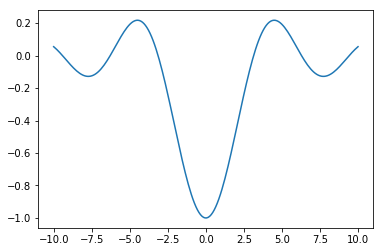

In [95]:
xr = np.linspace(-10,10,200)
yr = -np.sin(xr)/xr
plt.plot(xr,yr)

dydx = lambda x: (-x*np.cos(x) + np.sin(x))/x**2
x0 = -1
xopt = gradientDescent(x0, dydx)
print(xopt)